In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Creating correlated data from uncorrelated data

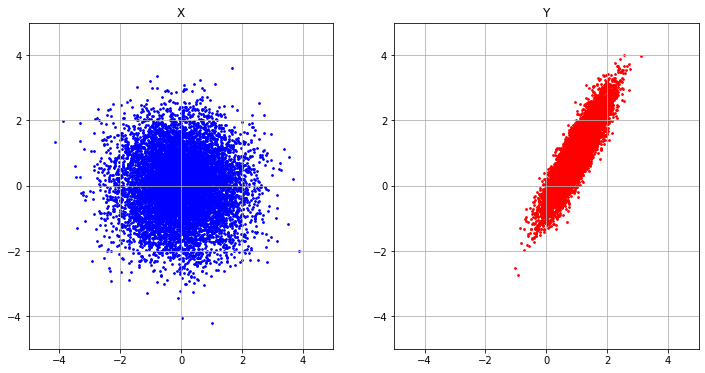

In [7]:
X = np.random.normal (0, 1, (10000,2) ) 

phi = np.pi/6
R = np.array([[ np.cos(phi), np.sin(phi)],       # rotation matrix
              [-np.sin(phi), np.cos(phi)] ])

Y = X * np.array([[0.2, 1.]])                    # compress
Y = Y @ R.T                                      # rotate
Y += np.array([[1., 1.]])                        # shift

def plot(X,Y):
    plt.figure(figsize=(12, 6), facecolor ='w')      
    ax = plt.subplot(1,2,1); ax.grid();  ax.set( ylim=(-5, 5), xlim=(-5, 5) )    
    plt.scatter(X[:,0],X[:,1], c="b", s=3); plt.title("X")
    ax = plt.subplot(1,2,2); ax.grid();  ax.set( ylim=(-5, 5), xlim=(-5, 5) )    
    plt.scatter(Y[:,0],Y[:,1], c="r", s=3); plt.title("Y")
    plt.show()
plot(X,Y)    

In [20]:
np.set_printoptions(precision=3, suppress=True)  

print( np.corrcoef(X.T) )                        # uncorrelated 
print( np.corrcoef(Y.T) )                        # correlated

[[1.    0.007 0.012]
 [0.007 1.    0.007]
 [0.012 0.007 1.   ]]
[[ 1.    -0.253  0.216]
 [-0.253  1.    -0.996]
 [ 0.216 -0.996  1.   ]]


## Removing the Correlation

covar:
 [[0.274 0.408]
 [0.408 0.755]]
[[0.523 0.   ]
 [0.78  0.383]]
[[ 1.912  0.   ]
 [-3.892  2.61 ]]


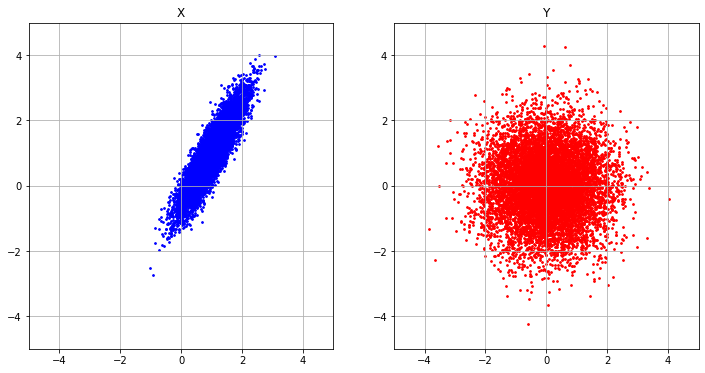

In [12]:
cov = np.cov(Y.T)
print("covar:\n", cov)

L = np.linalg.cholesky(cov)

print(L)

L = np.linalg.inv(L)

print(L)

Z = Y @ L.T
Z -= Z.mean(axis=0, keepdims=True)

plot(Y, Z) 

## n-dims

In [22]:
N, n = 10000, 3
X = np.random.normal (0, 1, (N,n) ) 

R = 2 * np.random.random((n,n)) - 1
R = R @ R.T                                      # symmetric

Y = X @ R.T                                      # rotate

print( np.corrcoef(X.T) )                        # uncorrelated 
print( np.corrcoef(Y.T) )                        # correlated

cov = np.cov(Y.T)
L   = np.linalg.cholesky(cov)
L   = np.linalg.inv(L)

Z = Y @ L.T
print( np.corrcoef(Z.T) )                        # uncorrelated 

print(L)

[[ 1.    -0.013 -0.004]
 [-0.013  1.    -0.   ]
 [-0.004 -0.     1.   ]]
[[ 1.    -0.709  0.8  ]
 [-0.709  1.    -0.204]
 [ 0.8   -0.204  1.   ]]
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
[[  2.787  -0.     -0.   ]
 [  2.8     1.245   0.   ]
 [-11.798  -2.059   3.34 ]]


## ...

In [58]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X = np.arange(20)
Y = np.array([0]*5+[1]*5+[2]*5+[3]*5)

for _ in range(5):
    X_trn, X_val, Y_trn, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y)
    print("%s %s" % (Y_trn, Y_val))

[1 2 0 3 0 2 0 3 3 1 2 1 2 0 3 1] [1 3 0 2]
[2 2 3 0 0 3 0 3 3 2 1 1 2 1 0 1] [0 2 3 1]
[1 1 3 1 0 3 2 3 0 2 2 0 2 1 0 3] [0 3 1 2]
[3 2 0 3 1 3 3 0 1 2 1 2 1 0 2 0] [2 1 0 3]
[3 2 0 2 0 2 2 1 0 1 3 0 3 1 3 1] [3 0 1 2]
